In [35]:
# INITIAL SETUP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
# DATA LOADING 
df=pd.read_csv('multidimensional_poverty.csv')

In [37]:
print("="*55)
print ("STEP 1: DATA CLEANING")
print("="*55)

STEP 1: DATA CLEANING


In [39]:
df=df.replace('..', np.nan)
df['MPI HDRO Percent']=df['MPI HDRO Percent'].astype(float)
df=df.dropna(subset=['MPI HDRO Percent'])
#Convertion of population strings to numerics
df['Population in Multidimensional Poverty']=df['Population in Multidimensional Poverty'].str.replace(',','').astype(float)
df


,Country,Year and Survey,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
0,Afghanistan,2010/2011 M,0.293,58.8,0.353,66.2,17116.0,49.9,45.6,19.2,35.2,35.8,NaN
1,Albania,2008/2009 D,0.005,1.2,0.005,1.4,38.0,38.3,22.4,47.1,30.5,14.3,0.5
2,Argentina,2005 N,0.015,3.7,0.011,2.9,1438.0,39.1,38.2,27.8,34.0,NaN,1.4
3,Armenia,2010 D,0.002,0.6,0.001,0.3,18.0,37.0,3.4,87.8,8.7,32.0,1.8
4,Azerbaijan,2006 D,0.009,2.4,0.021,5.3,210.0,38.2,20.0,50.7,29.3,5.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Vanuatu,2007 M,0.135,31.2,0.129,30.1,69.0,43.1,24.4,24.1,51.6,NaN,NaN
97,Viet Nam,2010/2011 M,0.026,6.4,0.017,4.2,5796.0,40.7,35.9,25.7,38.4,17.2,2.4
98,Yemen,2013 D,0.200,40.0,NaN,NaN,9754.0,50.1,29.5,32.2,38.2,34.8,9.8
99,Zambia,2013/2014 D,0.264,54.4,0.281,56.6,8173.0,48.6,17.9,29.8,52.3,60.5,74.3


In [41]:
print("="*55)
print("STEP 2:EXPLORATORY DATA ANALYSIS")
print("="*55)

STEP 2:EXPLORATORY DATA ANALYSIS


       MPI HDRO Percent  Education Deprivation  Health Deprivation
count        101.000000             101.000000          101.000000
mean          32.599010              25.306931           38.507921
std           29.718097              11.511214           19.097983
min            0.400000               1.500000           12.600000
25%            3.700000              17.900000           25.700000
50%           26.900000              26.400000           30.400000
75%           55.600000              33.700000           47.100000
max           89.800000              54.700000           95.900000


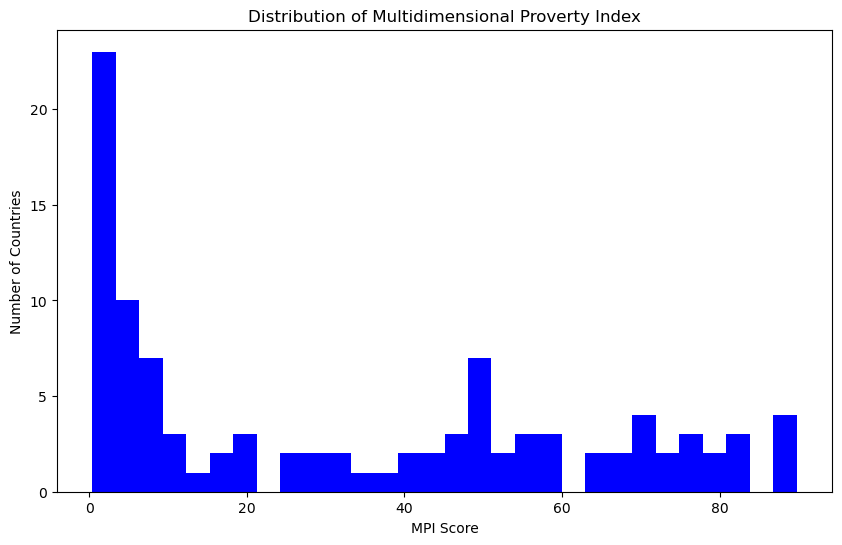

In [43]:
# Basic Statistics
print (df[['MPI HDRO Percent','Education Deprivation','Health Deprivation']].describe())
corr=df[['MPI HDRO Percent','Education Deprivation','Health Deprivation','Living Standards']].corr()
corr
# Poverty distribution histogram
plt.figure(figsize=(10,6))
plt.hist(df['MPI HDRO Percent'], bins=30, color='blue')
plt.title('Distribution of Multidimensional Proverty Index')
plt.xlabel('MPI Score')
plt.ylabel('Number of Countries')
plt.savefig('mpi_distribution.png')

In [44]:
print('='*55)
print('STEP 3: MACHINE LEARNING MODEL')
print('='*55)

STEP 3: MACHINE LEARNING MODEL


R-squared:0.57
Predicted MPI HDRO Percent: [32.592]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


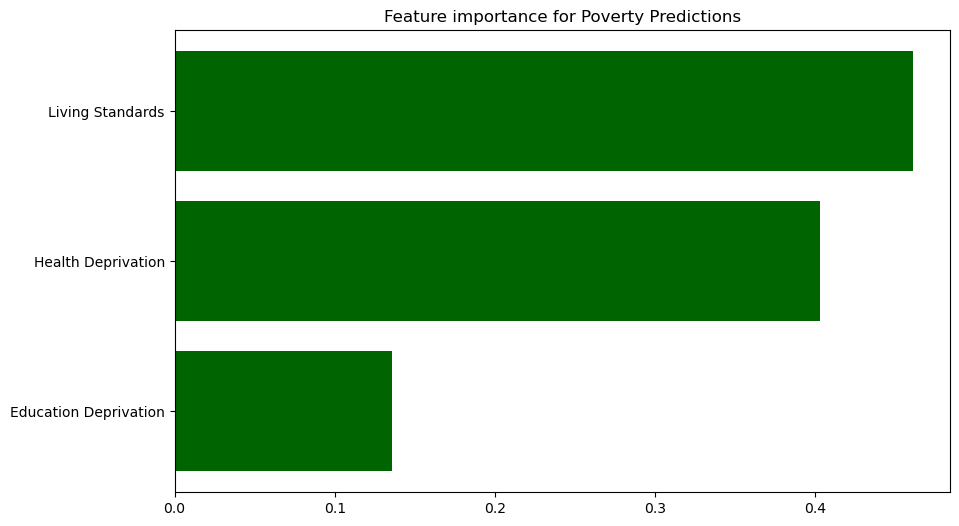

In [46]:
#Prepare features and target
X=df[['Education Deprivation','Health Deprivation','Living Standards']]
y=df['MPI HDRO Percent']
# Train-test split
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=42)
#Train model
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
# Evaluate
y_predict=model.predict(X_test)
print(f"R-squared:{r2_score(y_test,y_predict):.2f}")
# predicting random values
random_input=np.array([[0.3,0.5,0.7]]) # for [Education Deprevation ,Health Deprivation , Living Standards]
prediction=model.predict(random_input)
print(f"Predicted MPI HDRO Percent: {prediction}")
# Feature Importance 
importances=model.feature_importances_
features=X.columns
plt.figure(figsize=(10,6))
plt.barh(features,importances,color='darkgreen')
plt.title('Feature importance for Poverty Predictions')
plt.savefig('feature_imporrtance.png')

In [48]:
print('='*55)
print('STEP 4: POVERTY CLUSTER ANALYSIS')
print('='*55)

STEP 4: POVERTY CLUSTER ANALYSIS


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


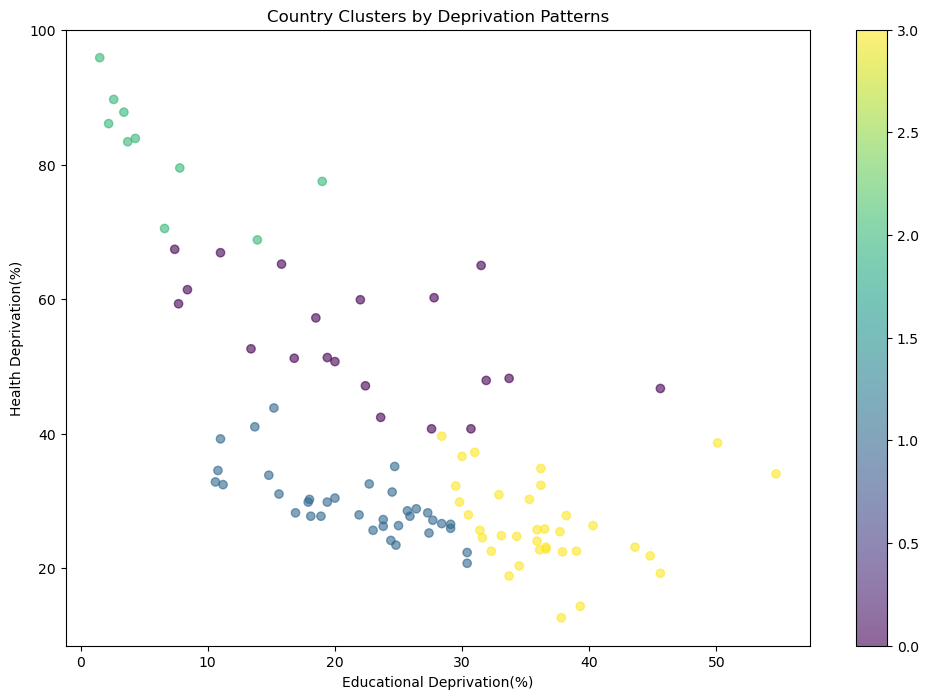

In [51]:
kmeans=KMeans(n_clusters=4,random_state=42)
clusters=kmeans.fit_predict(X)
# Visualize Clusters
plt.figure(figsize=(12,8))
scatter=plt.scatter(X['Education Deprivation'],X['Health Deprivation'],c=clusters,cmap='viridis',alpha=0.6)
plt.colorbar(scatter)
plt.title('Country Clusters by Deprivation Patterns')
plt.xlabel('Educational Deprivation(%)')
plt.ylabel('Health Deprivation(%)')
plt.savefig('deprivatio_cluster.png')
# Add clusters to dataframe
df['Clusster']=clusters

In [52]:
print("="*55)
print("STEP 5: KEY VISUALIZATIONS")
print("="*55)

STEP 5: KEY VISUALIZATIONS


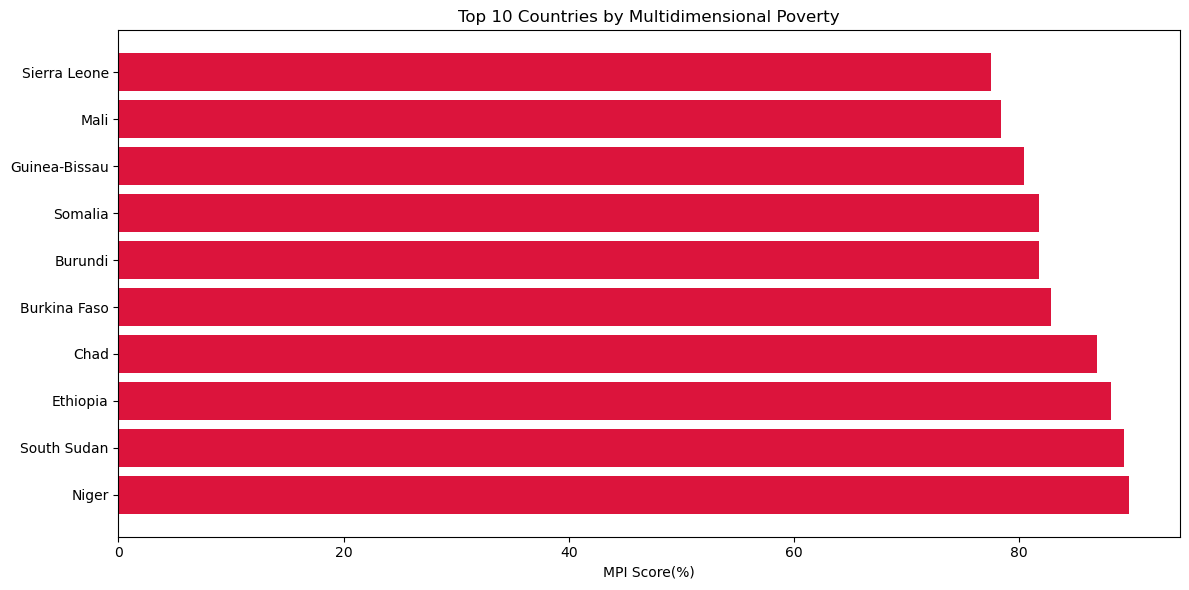

In [55]:
# Top 10 most deprived countries
top10=df.nlargest(10,'MPI HDRO Percent')
plt.figure(figsize=(12,6))
plt.barh(top10['Country'],top10['MPI HDRO Percent'],color='crimson')
plt.title('Top 10 Countries by Multidimensional Poverty')
plt.xlabel('MPI Score(%)')
plt.tight_layout()
plt.savefig('top10_deprived.png')

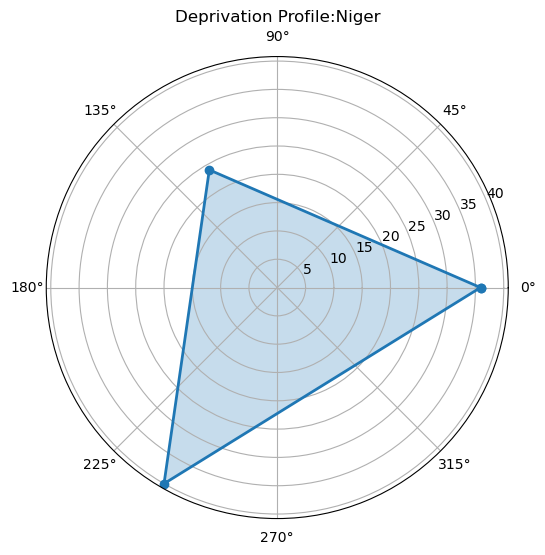

In [62]:
def plot_radar_chart(country):
    data=df[df['Country']==country].iloc[0]
    categories=['Education','Health','Living Standards']
    values=[data['Education Deprivation'],data['Health Deprivation'],data['Living Standards']]
    angles=np.linspace(0,2*np.pi,len(categories),endpoint=False)
    values=np.concatenate((values,[values[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    fig=plt.figure(figsize=(6,6))
    ax=fig.add_subplot(111,polar=True)
    ax.plot(angles,values,'o-',linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Deprivation Profile:{country}')
    plt.savefig(f'{country}_radar.png')
plot_radar_chart('Niger')